* Code comparisions of Ann and Linear Regression
* Code comparision of Ann and Logistic Regression
* Ann on csv_datasets

## **Ann vs Linear Regression**

### **Example - 1**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, precision_score, mean_squared_error
from sklearn.datasets import make_regression

import keras
from keras import layers

In [2]:
X, y = make_regression(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    noise=7,
    bias=5.1,
    random_state=42
)

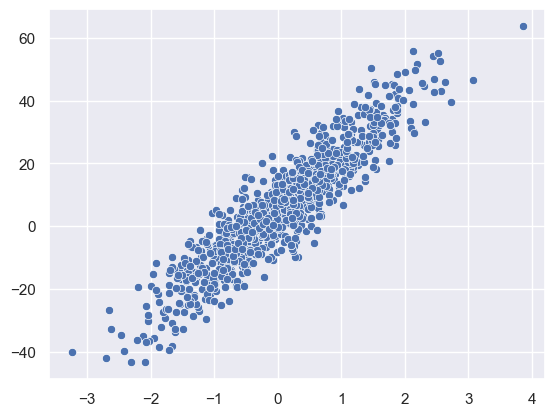

In [3]:
# visualizing

sns.set_theme(style='darkgrid')
sns.scatterplot(x=X.reshape(-1), y=y)
plt.show()

In [4]:
# splitting the data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# scaling the data

from sklearn.preprocessing import StandardScaler

sc  = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

#### **Linear Regression**

In [6]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(x_train_scaled, y_train)

LinearRegression()

In [7]:
# getting the weights and bias values

coefficient = reg.coef_
bias = reg.intercept_

print(f"coefficent is : {coefficient[0]:.4f}\nbias is: {bias:.4f}")

coefficent is : 16.1988
bias is: 5.2979


In [8]:
y_pred = reg.predict(x_test_scaled)

print(f"MSE on test data: {mean_squared_error(y_test, y_pred):.4f}")

MSE on test data: 52.8710


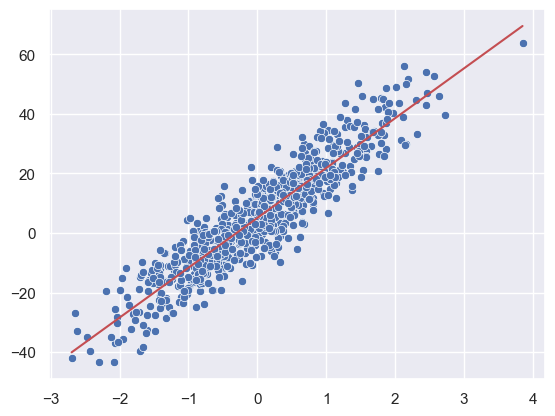

In [9]:
# plotting with the values

pred = reg.predict(x_train_scaled)

sns.scatterplot(x=x_train.reshape(-1), y=y_train)
sns.lineplot(x=x_train.reshape(-1), y=pred, color='r')
plt.show()

#### **Ann**

In [10]:
# building a Perceptron

reg_ann = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(1)
])

reg_ann.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsoluteError()]
)

reg_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_mean_absolute_error',
    patience=4,
    restore_best_weights=True,
    mode='min'
)

In [12]:
history = reg_ann.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=700,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/700
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 286.7546 - mean_absolute_error: 13.3675 - val_loss: 314.4221 - val_mean_absolute_error: 14.1988
Epoch 2/700
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 285.8138 - mean_absolute_error: 13.3453 - val_loss: 313.4007 - val_mean_absolute_error: 14.1755
Epoch 3/700
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 284.8805 - mean_absolute_error: 13.3234 - val_loss: 312.3676 - val_mean_absolute_error: 14.1519
Epoch 4/700
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 283.9454 - mean_absolute_error: 13.3019 - val_loss: 311.3384 - val_mean_absolute_error: 14.1283
Epoch 5/700
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 283.0265 - mean_absolute_error: 13.2802 - val_loss: 310.2959 - val_mean_absolute_error: 14.1044
Epoch 6/700
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 282.0973 - mean_absolute_error: 13.2580 - val_loss: 309.2794 - val_mean_absolute_error: 14.0810
Epoch 7/700
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 281.1888 -

In [13]:
# getting the weights

print(f"Linear reg weights are:\ncoefficent is : {reg.coef_[0]:.4f}\nbias is: {reg.intercept_:.4f}\n")
print(f"Ann Perceptron weiths are:\ncoefficient is: {reg_ann.get_weights()[0][0][0]:.4f}\nbias is: {reg_ann.get_weights()[1][0]:.4f}")

Linear reg weights are:
coefficent is : 16.1988
bias is: 5.2979

Ann Perceptron weiths are:
coefficient is: 15.5473
bias is: 5.2973


we can observe that, in both the cases we got same resulted weights.

* With Liear Regression, we only learn the linear relationship between the inputs and outputs
* With the help of Ann, we can also learn the non linear relationship, with the help of activation functions and improving the complexity of the model

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


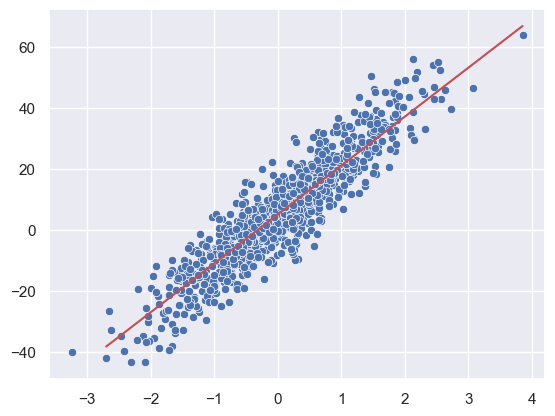

In [15]:
# plotting with ann weights

y_pred = reg_ann.predict(x_train_scaled)

sns.scatterplot(x=X.ravel(), y=y)
sns.lineplot(x=x_train.ravel(), y=y_pred.ravel(), color = 'r')
plt.show()

### **Example-2**

In [42]:
X, y = make_regression(
    n_samples=1000,
    n_features=11,
    n_informative=11,
    noise=7,
    bias=-2.39,
    random_state=42
)

In [43]:
# splitting the data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# scaling the data

from sklearn.preprocessing import StandardScaler

sc  = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

#### **Multiple Linear Regression**

In [45]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(x_train_scaled, y_train)

LinearRegression()

In [47]:
# getting the weights and bias values

coefficients = reg.coef_
bias = reg.intercept_

print(f"coefficents are : {coefficients}\n\nbias is: {bias:.4f}")

coefficents are : [ 9.54973725 75.40224863 85.82133546 27.71738427 98.29932365 61.64827457
 15.35303153 18.42044914  6.8455487  65.53431664 43.58946196]

bias is: -2.6141


In [48]:
from sklearn.metrics import mean_absolute_error

y_pred = reg.predict(x_test_scaled)

print(f"MSE on test data: {mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE on test data: {mean_absolute_error(y_test, y_pred):.4f}")

MSE on test data: 53.7523
MAE on test data: 5.7627


#### **ANN Perceptron**

In [49]:
# building a Perceptron

reg_ann = keras.Sequential([
    keras.Input(shape=(11,)),
    layers.Dense(1)
])

reg_ann.compile(
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsoluteError()]
)

reg_ann.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = reg_ann.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=2000,
    verbose=0,
    batch_size=len(x_train_scaled)
)

In [51]:
# getting the weights

print(f"Linear reg weights are:\ncoefficent is : {reg.coef_}\nbias is: {reg.intercept_:.4f}\n")
print(f"Ann Perceptron weiths are:\ncoefficient is: {reg_ann.get_weights()[0].ravel()}\nbias is: {reg_ann.get_weights()[1][0]:.4f}")

Linear reg weights are:
coefficent is : [ 9.54973725 75.40224863 85.82133546 27.71738427 98.29932365 61.64827457
 15.35303153 18.42044914  6.8455487  65.53431664 43.58946196]
bias is: -2.6141

Ann Perceptron weiths are:
coefficient is: [ 9.144433 72.82121  84.04363  27.498604 95.62638  60.301468 16.029554
 17.55107   6.575338 63.676556 42.519238]
bias is: -2.5664


In [52]:
# MAE on test data for both models

y_pred = reg.predict(x_test_scaled)
y_pred_ann = reg_ann.predict(x_test_scaled)

print(f"MAE on test data for Linear Regression: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MAE on test data for ANN Perceptron: {mean_absolute_error(y_test, y_pred_ann.ravel()):.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MAE on test data for Linear Regression: 5.7627
MAE on test data for ANN Perceptron: 7.7265


### **Example-3**

#### **Polynomial Regression**

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [17]:
# generating the data

np.random.seed(42)
X = np.linspace(-4, 4, 300).reshape(-1,1)
y = 5.2*X**2 + 3.76*X + 10.12 + np.random.randn(300, 1)*10
y = y.ravel()

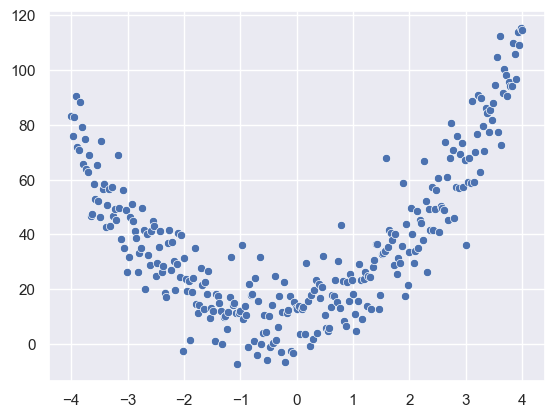

In [18]:
sns.scatterplot(x=X.reshape(-1), y=y)
plt.show()

In [19]:
# splitting the data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [21]:
# pipeline 
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])


param_grid = {
    'poly__degree': list(range(1, 10))
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring = 'neg_mean_absolute_error',
    n_jobs=-1
)

In [22]:
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('lin_reg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_absolute_error')

In [23]:
# best model

best_model = grid_search.best_estimator_
best_degree = grid_search.best_params_['poly__degree']


# evaluate on test set
y_pred = best_model.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best polynomial degree: {best_degree}")
print(f"Test MAE: {mae:.4f}")

Best polynomial degree: 6
Test MAE: 6.4416


In [24]:
# weights

poly_reg = best_model.named_steps["lin_reg"]

print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)

Intercept: 9.423872510843282
Coefficients: [10.96742336 35.4957014  -2.76449106 -9.62567222  0.82392247  2.58206574]


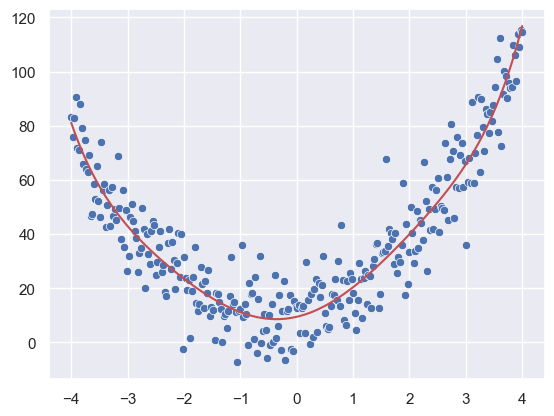

In [25]:
# visualize

y_pred = best_model.predict(x_train_scaled)

sns.scatterplot(x=X.reshape(-1), y=y)
sns.lineplot(x=x_train.ravel(), y=y_pred, color='r')
plt.show()

#### **MLP**

In [35]:
ann_mlp = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1)
])

ann_mlp.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsoluteError()]
)

ann_mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_mean_absolute_error',
    patience=10,
    restore_best_weights=True,
    mode='min'
)

In [39]:
history2 = ann_mlp.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=200,
    verbose=0,
    # callbacks=[early_stopping]
)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


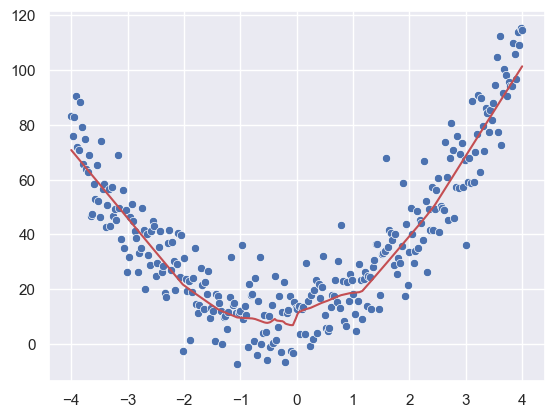

In [40]:
# visualize the predictions of the Ann MLP

y_pred = ann_mlp.predict(x_train_scaled)

sns.scatterplot(x=X.reshape(-1), y=y)
sns.lineplot(x=x_train.ravel(), y=y_pred.ravel(), color='r')
plt.show()

## **Ann vs Classification (ML)**

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, precision_score, mean_squared_error
from sklearn.datasets import make_classification

import keras
from keras import layers

In [54]:
# preparing data

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=34
)

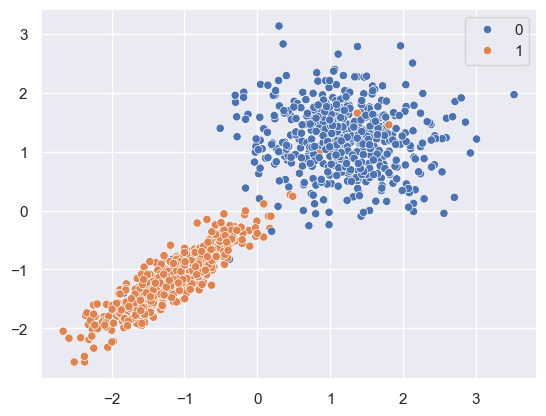

In [55]:
# visualizing the data
sns.set_theme(style='darkgrid')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [56]:
# train test splitting

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# normalizing the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled= sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

### **Using Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [59]:
# printing model weights

print(f"Coefficients: {log_reg.coef_}\nIntercept: {log_reg.intercept_}")

Coefficients: [[-2.35442674 -3.28512565]]
Intercept: [0.07151112]


In [60]:
# metrics

y_pred = log_reg.predict(x_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.9800
Precision: 0.9903
Recall: 0.9714
F1 Score: 0.9808


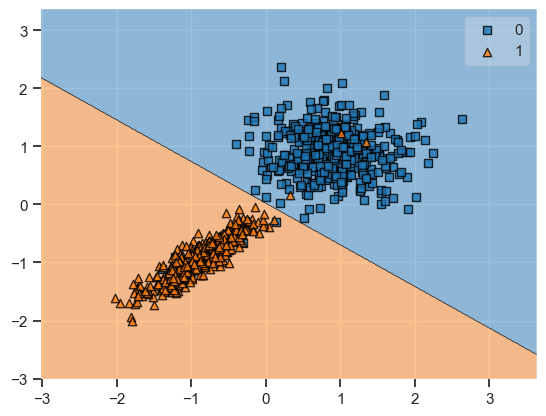

In [61]:
# decision boundary observation

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=x_train_scaled, y=y_train, clf=log_reg)
plt.show()

### **Ann Perceptron**

In [62]:
# building an Ann Perceptron model
from tensorflow import keras
from keras import layers

ann_BinCl = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])

ann_BinCl.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name='accuracy')]
)

ann_BinCl.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min'
)

In [64]:
# training the ann model

history2 = ann_BinCl.fit(
    x_train_scaled, y_train,
    validation_data = (x_test_scaled, y_test),
    epochs = 200,
    callbacks=[early_stopping]
)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9862 - loss: 0.3480 - val_accuracy: 0.9600 - val_loss: 0.3585
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9875 - loss: 0.3367 - val_accuracy: 0.9650 - val_loss: 0.3479
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9887 - loss: 0.3261 - val_accuracy: 0.9700 - val_loss: 0.3378
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9887 - loss: 0.3159 - val_accuracy: 0.9750 - val_loss: 0.3282
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9900 - loss: 0.3063 - val_accuracy: 0.9750 - val_loss: 0.3191
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9900 - loss: 0.2973 - val_accuracy: 0.9750 - val_loss: 0.3104
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9900 - loss: 0.2886 - val_accuracy: 0.9750 - val_loss: 0.3022
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9900 - loss: 0.2804 - val_accuracy: 0.9750 -

In [65]:
# getting the both model weights

print("Weights of Logestic regression is: ")
print(f"Coefficients: {log_reg.coef_[0]}\nIntercept: {log_reg.intercept_}")
print("\nWeights of Ann model is :")
print(f"Coefficients: {ann_BinCl.get_weights()[0].ravel()}\nIntercept: {ann_BinCl.get_weights()[1]}")

Weights of Logestic regression is: 
Coefficients: [-2.35442674 -3.28512565]
Intercept: [0.07151112]

Weights of Ann model is :
Coefficients: [-2.1245387 -3.2066708]
Intercept: [0.05335678]


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


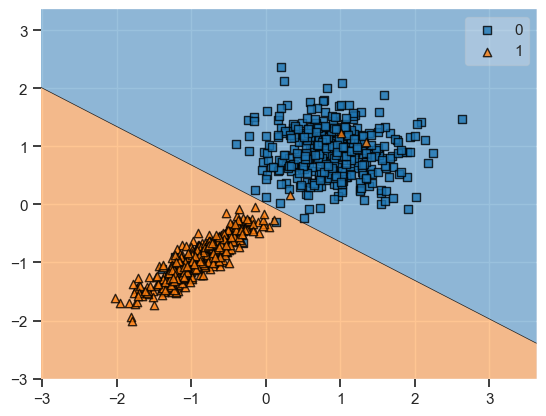

In [66]:
# decision boundary by the ann model

plot_decision_regions(x_train_scaled, y_train, clf=ann_BinCl)
plt.show()

In [67]:
y_pred = log_reg.predict(x_test_scaled)
probs = ann_BinCl.predict(x_test_scaled)
y_pred_ann = (probs >= 0.5).astype(int)

print(f"F1 score achieved by 'Logestic Reg' on test data: {f1_score(y_test, y_pred):.4f}")
print(f"F1 score achieved by 'Ann model' on test data: {f1_score(y_test, y_pred_ann):.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
F1 score achieved by 'Logestic Reg' on test data: 0.9808
F1 score achieved by 'Ann model' on test data: 0.9808


If we introduced the non-linearity to the Ann model, then the inference of the Ann model would be increased alot

## **Ann on CSV datasets**

### **For Regression**

In [68]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
from keras import layers


In [70]:
# loading the data

data = pd.read_csv('../datasets/Folds5x2_pp.csv')

print(f"Shape of data: {data.shape}")
data.head()

Shape of data: (9568, 5)


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Data Description:

Features consist of hourly average ambient variables

* Temperature (T) in the range 1.81°C and 37.11°C,
* Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
* Relative Humidity (RH) in the range 25.56% to 100.16%
* Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
* Net hourly electrical energy output (EP) 420.26-495.76 MW The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

In [71]:
data.corr()['PE']

AT   -0.948128
V    -0.869780
AP    0.518429
RH    0.389794
PE    1.000000
Name: PE, dtype: float64

In [72]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [73]:
# splitting the data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# scaling the data

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [75]:
reg_model = keras.Sequential([
    keras.Input(shape=(4,)),
    layers.Dense(32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

reg_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsoluteError()]
)

reg_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,841 (218.13 KB)

 Trainable params: 54,881 (214.38 KB)

 Non-trainable params: 960 (3.75 KB)

In [76]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_mean_absolute_error',
    patience=5,
    restore_best_weights=True
)

In [77]:
history = reg_model.fit(
    x_train_scaled, y_train,
    validation_split=0.2,
    epochs = 200,
    callbacks = [early_stopping]
)

Epoch 1/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 203416.3281 - mean_absolute_error: 450.7553 - val_loss: 199783.8750 - val_mean_absolute_error: 446.8000
Epoch 2/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 191937.3750 - mean_absolute_error: 437.9463 - val_loss: 183583.8594 - val_mean_absolute_error: 428.3511
Epoch 3/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 172155.8438 - mean_absolute_error: 414.6221 - val_loss: 160669.7812 - val_mean_absolute_error: 400.4602
Epoch 4/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 144757.5312 - mean_absolute_error: 379.5098 - val_loss: 129890.2266 - val_mean_absolute_error: 359.2919
Epoch 5/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 113027.5859 - mean_absolute_error: 333.9975 - val_loss: 98965.2969 - val_mean_absolute_error: 312.3160
Epoch 6/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 82074.3125 - mean_absolute_error: 282.7355 - val_loss: 68473.2188 - val_mean_absolute_error: 258.2055
Epoch 7/200
1

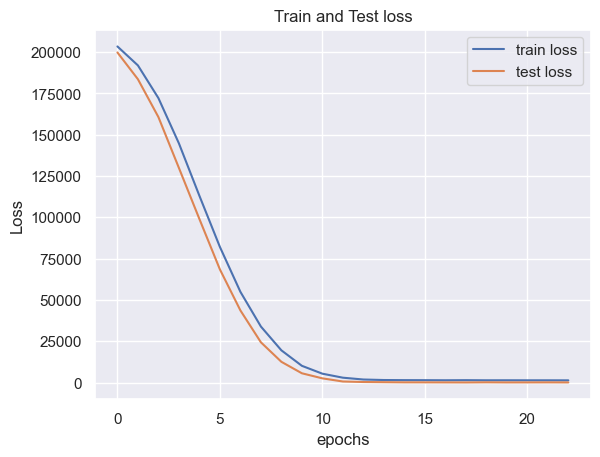

In [78]:
# plotting the loss curves

sns.set_theme(style='darkgrid')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.title('Train and Test loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
# mean absolute error on train and test data
from sklearn.metrics import mean_absolute_error

y_pred_train = reg_model.predict(x_train_scaled)
y_pred_test = reg_model.predict(x_test_scaled)

print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train.ravel()):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test.ravel()):.4f}")

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train MAE: 5.3304
Test MAE: 5.3069


### **For Classification**

Multiclass classification

In [80]:
# loading the data
from sklearn.datasets import load_iris

In [81]:
iris_data = load_iris()

X, y = iris_data.data, iris_data.target

In [82]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [83]:
print(f"Shape of data: {X.shape}")

Shape of data: (150, 4)


In [84]:
# number of classes in target variable
len(set(y))

3

In [85]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# scaling the data

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [87]:
# classifier building

classifier = keras.Sequential([
    keras.Input(shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

classifier.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name='Accuracy')]
)

classifier.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# train the model

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    mode='min'
)

history = classifier.fit(
    x_train_scaled, y_train, 
    validation_data=(x_test_scaled, y_test),
    epochs = 50,
    callbacks=[early_stopping]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - Accuracy: 0.4083 - loss: 1.0871 - val_Accuracy: 0.5000 - val_loss: 1.0337
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - Accuracy: 0.4917 - loss: 1.0489 - val_Accuracy: 0.5333 - val_loss: 0.9965
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - Accuracy: 0.5167 - loss: 1.0155 - val_Accuracy: 0.5333 - val_loss: 0.9643
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - Accuracy: 0.5500 - loss: 0.9856 - val_Accuracy: 0.5333 - val_loss: 0.9352
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - Accuracy: 0.5833 - loss: 0.9578 - val_Accuracy: 0.5667 - val_loss: 0.9073
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - Accuracy: 0.6083 - loss: 0.9314 - val_Accuracy: 0.6333 - val_loss: 0.8810
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - Accuracy: 0.6417 - loss: 0.9059 - val_Accuracy: 0.6667 - val_loss: 0.8560
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - Accuracy: 0.6583 - loss: 0.8804 - val_Accuracy: 0.7667 - val_loss: 0.8319


In [89]:
test_loss, test_acc = classifier.evaluate(x_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Test accuracy: 0.9333
Test loss: 0.2344


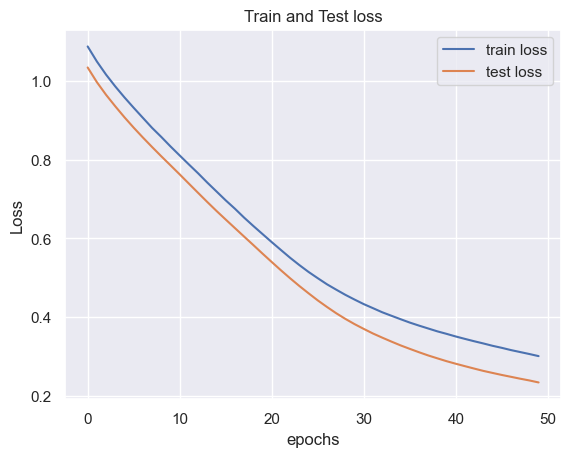

In [90]:
# train and test loss curves

sns.set_theme(style='darkgrid')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.title('Train and Test loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()